In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta

In [2]:
# read historical data

df=pd.read_csv('weather.csv')

In [3]:
df.shape

(366, 8)

In [4]:
df.isnull().mean()

,0
MinTemp,0.000000
MaxTemp,0.000000
WindGustDir,0.008197
WindGustSpeed,0.005464
Humidity,0.000000
Pressure,0.000000
Temp,0.000000
RainTomorrow,0.000000


In [5]:
df.dropna(inplace=True)

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.head(4)

,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,Humidity,Pressure,Temp,RainTomorrow
0,8.0,24.3,NW,30.0,29,1015.0,23.6,Yes
1,14.0,26.9,ENE,39.0,36,1008.4,25.7,Yes
2,13.7,23.4,NW,85.0,69,1007.2,20.2,Yes
3,13.3,15.5,NW,54.0,56,1007.0,14.1,Yes


In [8]:
# converting categorical data to numerical
le=LabelEncoder()
df['WindGustDir']=le.fit_transform(df['WindGustDir'])
df['RainTomorrow']=le.fit_transform(df['RainTomorrow'])



In [9]:
df.head(4)

,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,Humidity,Pressure,Temp,RainTomorrow
0,8.0,24.3,7,30.0,29,1015.0,23.6,1
1,14.0,26.9,1,39.0,36,1008.4,25.7,1
2,13.7,23.4,7,85.0,69,1007.2,20.2,1
3,13.3,15.5,7,54.0,56,1007.0,14.1,1


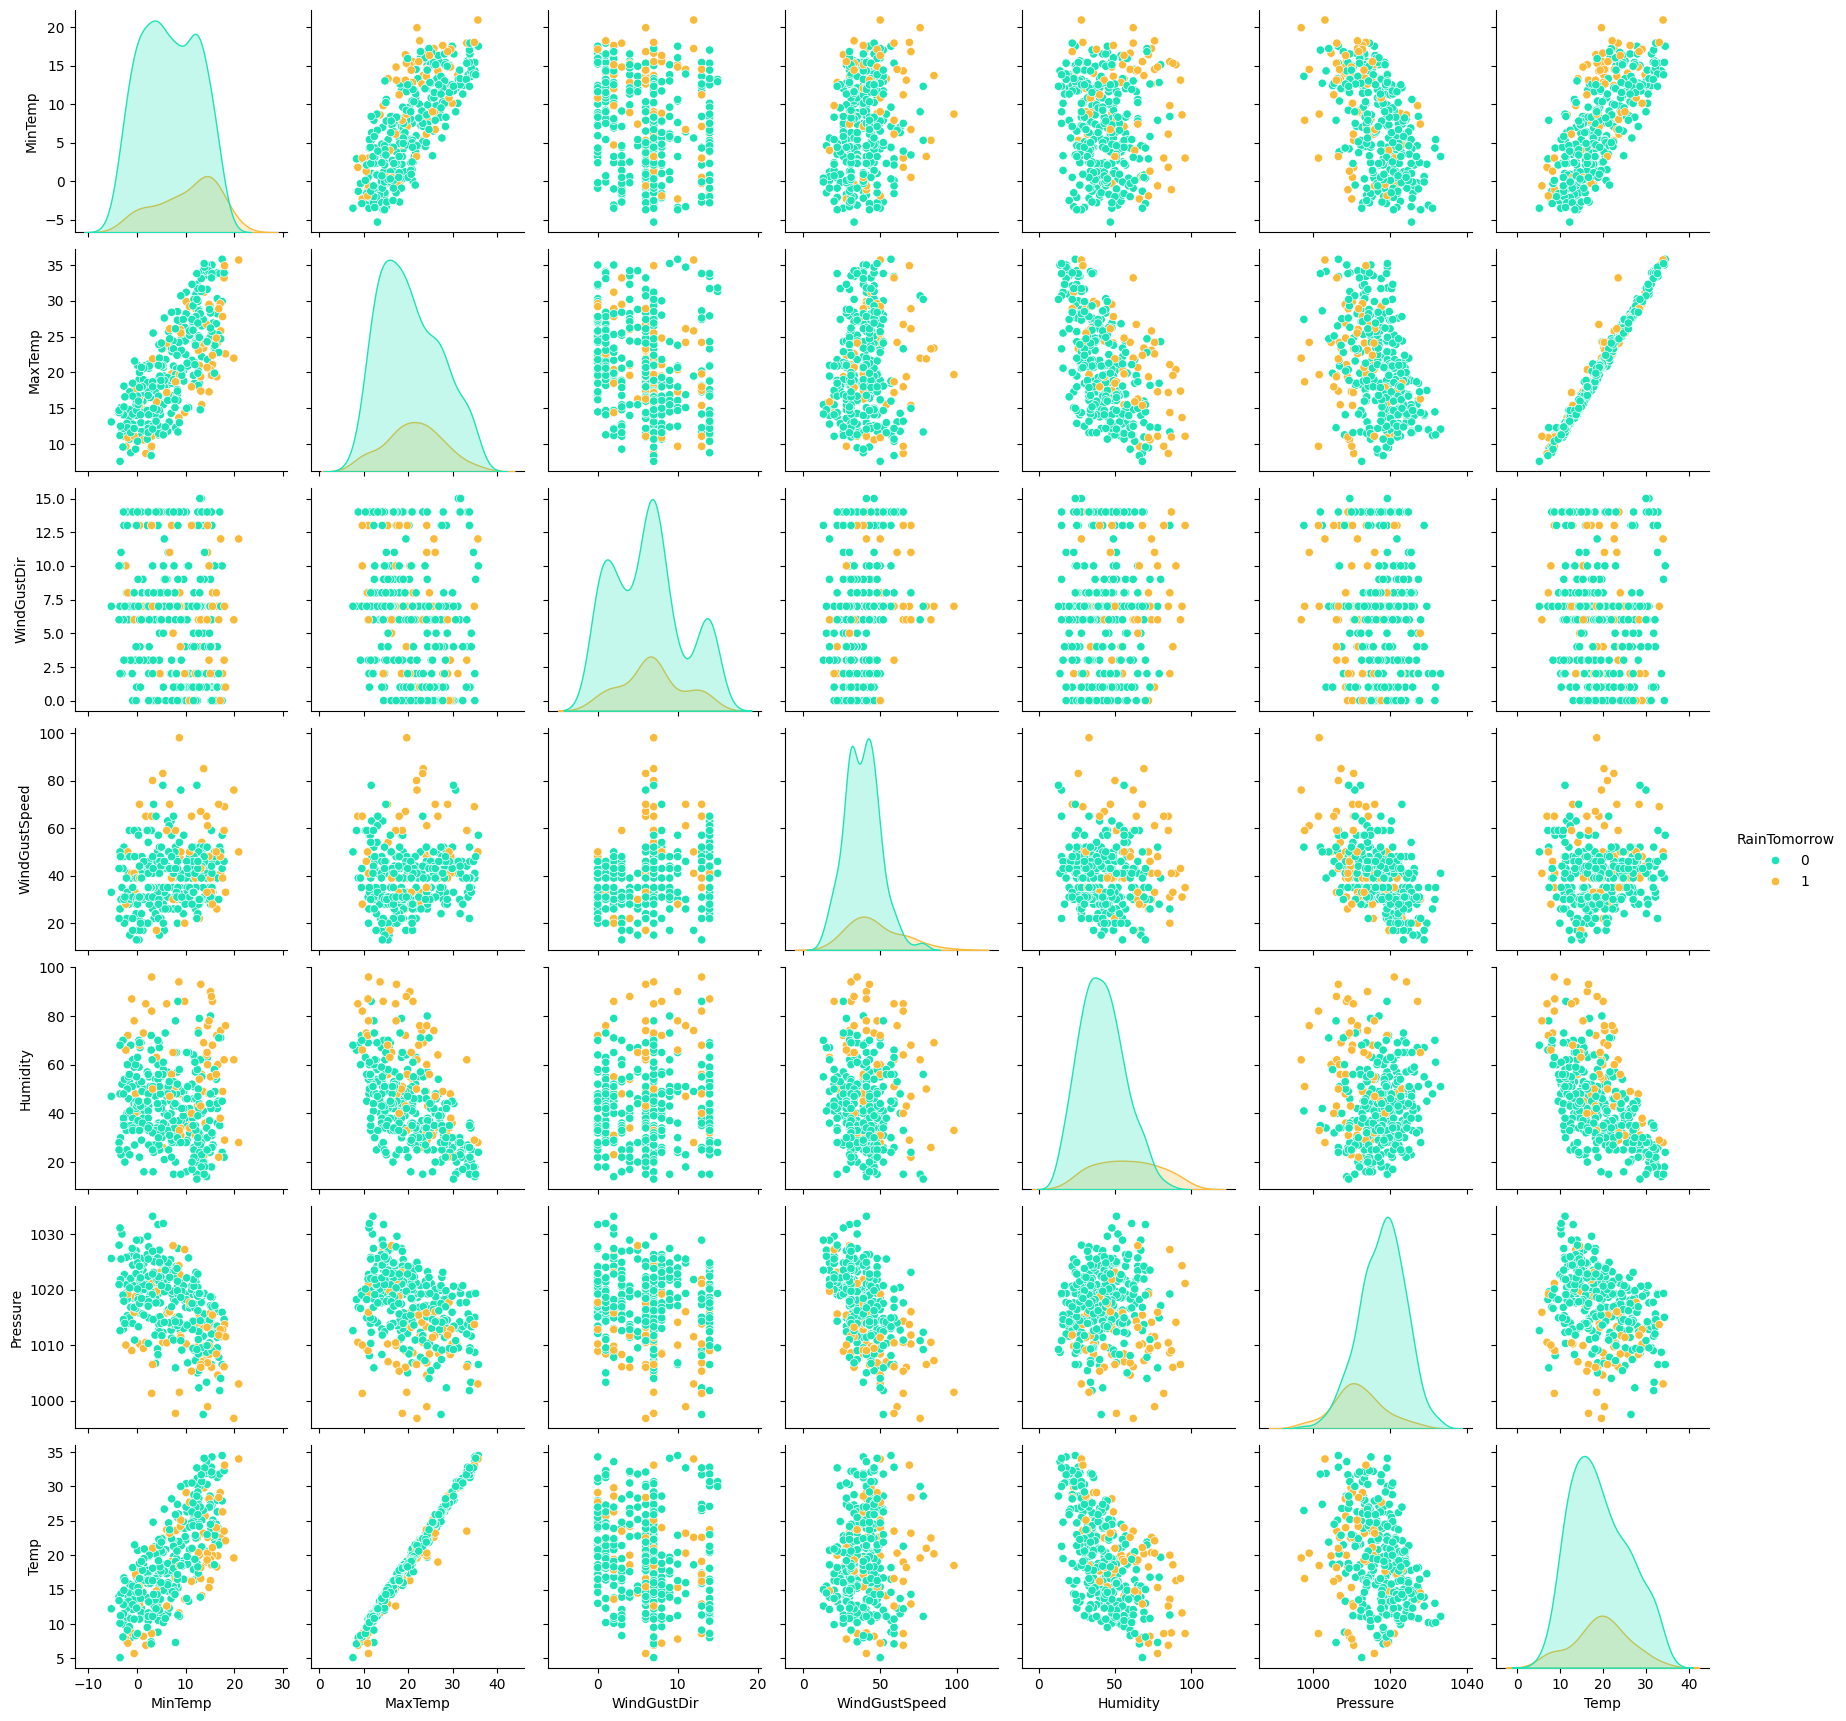

In [10]:
import seaborn as sns

sns.pairplot(df, hue = "RainTomorrow", palette = "turbo")

<ipython-input-11-c007960f0616>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MaxTemp'])


<Axes: xlabel='MaxTemp', ylabel='Density'>

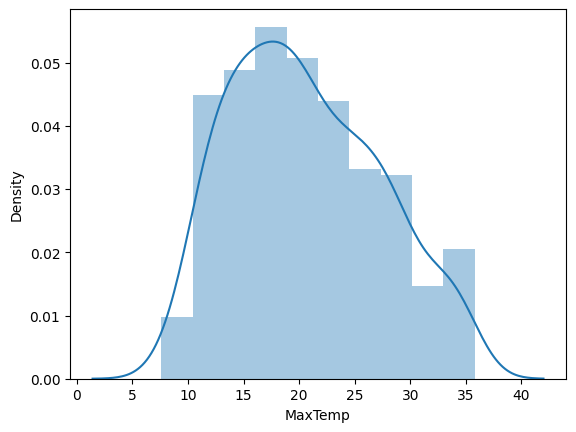

In [11]:
sns.distplot(df['MaxTemp'])

In [12]:
df.skew().sort_values(ascending=False)

,0
RainTomorrow,1.656770
WindGustSpeed,0.841930
Humidity,0.596639
MaxTemp,0.341837
Temp,0.296296
WindGustDir,0.293462
MinTemp,-0.011592
Pressure,-0.296521


<ipython-input-13-70a935b015a0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Pressure'])


<Axes: xlabel='Pressure', ylabel='Density'>

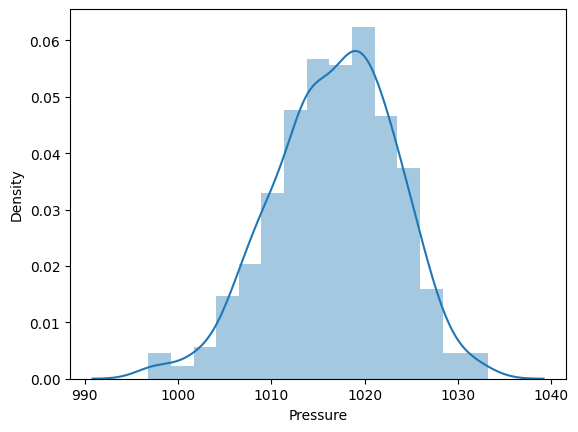

In [13]:
sns.distplot(df['Pressure'])

<ipython-input-14-a7dde46d9795>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Pressure'])


<Axes: xlabel='Pressure', ylabel='Density'>

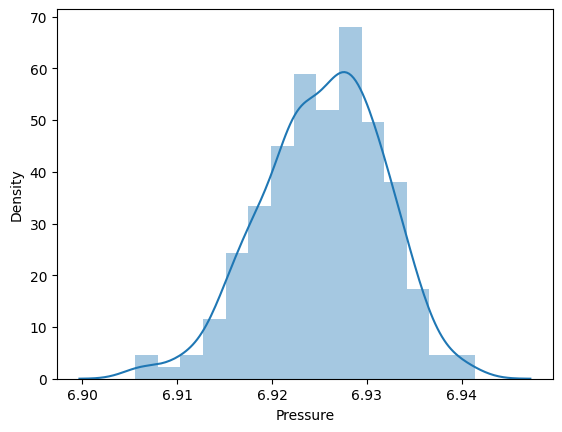

In [14]:
df['Pressure'] = np.log1p(df['Pressure'])  # log(1 + x)
sns.distplot(df['Pressure'])


In [15]:
from sklearn.preprocessing import PowerTransformer

# Selecting skewed features
skewed_features = ['WindGustSpeed', 'Humidity']

pt = PowerTransformer(method='yeo-johnson')
# Fit and transform
df[skewed_features] = pt.fit_transform(df[skewed_features])


In [16]:
# splitiing the data
x=df.drop(columns=['RainTomorrow'])
y=df['RainTomorrow']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


#  taning the model
# random forest
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)


#  prediction
y_pred=model.predict(x_test)

print("accuracy: ",accuracy_score(y_test, y_pred))


# mean squared error
print("mean squared error :")
print(mean_squared_error(y_test,y_pred))


accuracy:  0.8493150684931506
mean squared error :
0.1506849315068493


In [17]:
# splitiing the data

x=df.drop(columns=['RainTomorrow'])
y=df['RainTomorrow']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


#  taning the model
# Gradient Boosting
import xgboost as xgb
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(x_train, y_train)


#  prediction
y_pred=model.predict(x_test)
print("accuracy: ",accuracy_score(y_test, y_pred))

# mean squared error
print("mean squared error :")
print(mean_squared_error(y_test,y_pred))


accuracy:  0.8493150684931506
mean squared error :
0.1506849315068493


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:06:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [18]:
import pickle
with open('rain_model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("Model saved as 'rain_model.pkl'")

Model saved as 'rain_model.pkl'


In [19]:
df.head(1)

,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,Humidity,Pressure,Temp,RainTomorrow
0,8.0,24.3,7,-0.728618,-0.916336,6.923629,23.6,1


# Now working with realtime data


In [33]:
import requests

api_key ='e3ebc63fa8d066ecd56de1c8cbe220a0'
base_url='https://api.openweathermap.org/data/2.5/'

# Fetch current weather data
def get_weather_data(city):
  url = f"{base_url}weather?q={city}&appid={api_key}&units=metric"
  response=requests.get(url)
  data = response.json()
  if response.status_code != 200:
    print("Error fetching weather data")
    return None

  weather_data=  {
      'city' : data['name'],
      'feels_like': round(data['main']['feels_like']),
      'MinTemp' : round(data['main']['temp_min']),
      'MaxTemp' : round(data['main']['temp_max']),
      'WindGustDir' : data['wind']['deg'],
      'WindGustSpeed' : data['wind']['speed'],
      'Humidity' : round(data['main']['humidity']),
      'Pressure' : data['main']['pressure'],
      'Temp': round(data['main']['temp']),
      'country' : data['sys']['country'],


  }
  return weather_data

In [34]:
import pandas as pd

def preprocess_input(weather_data):
    data = pd.DataFrame([weather_data])

    le=LabelEncoder()
    data['WindGustDir']=le.fit_transform(data['WindGustDir'])
    return data



In [35]:
with open('rain_model.pkl', 'rb') as f:
  model=pickle.load(f)

def predict_rain(data,model):
  prediction=model.predict(data.drop(columns=['city','country','feels_like']))
  return "Yes" if prediction[0] == 1 else "No"

In [36]:
def main():
  city = input("enter city name: ")
  weather_data = get_weather_data(city)
  if weather_data is None:
    return

  for key, value in weather_data.items():
    print(f"{key}: {value}")

  input_df=preprocess_input(weather_data)
  rain_result=predict_rain(input_df,model)

  print("\n Will it rain tomorrow in ",city, "?", rain_result)


In [37]:
main()

enter city name: indore
city: Indore
feels_like: 30
MinTemp: 29
MaxTemp: 29
WindGustDir: 270
WindGustSpeed: 4.12
Humidity: 54
Pressure: 1003
Temp: 29
country: IN

 Will it rain tomorrow in  indore ? Yes
